# Many to many relationships 2
## 팔로우 기능 구현
### 프로필 페이지
- 각 회원의 개인 프로필 페이지에 팔로우 기능을 구현하기 위해 프로필 페이지를 먼저 구현하기

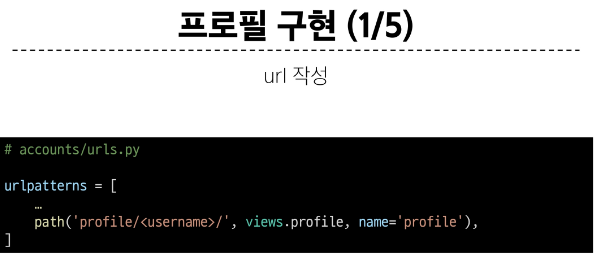

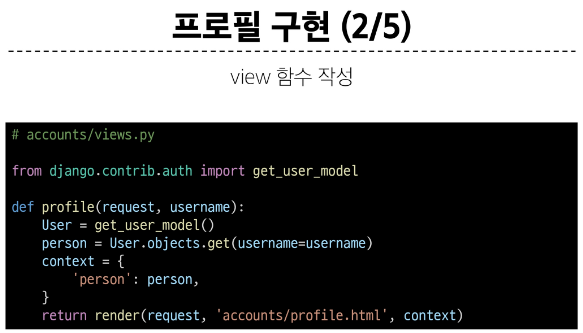

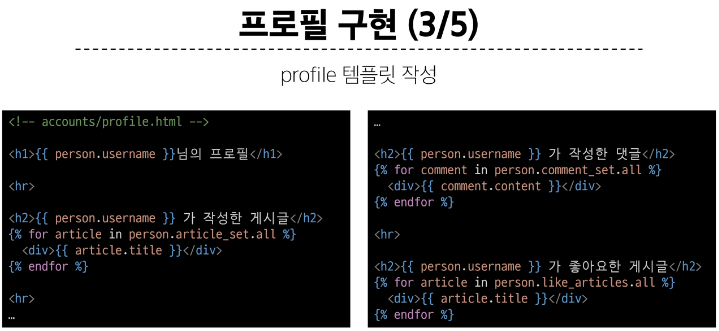

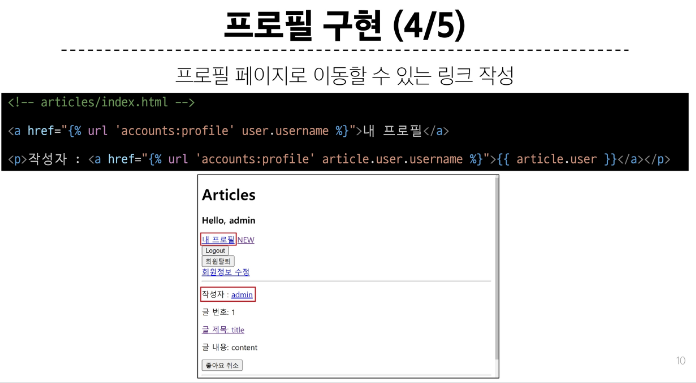

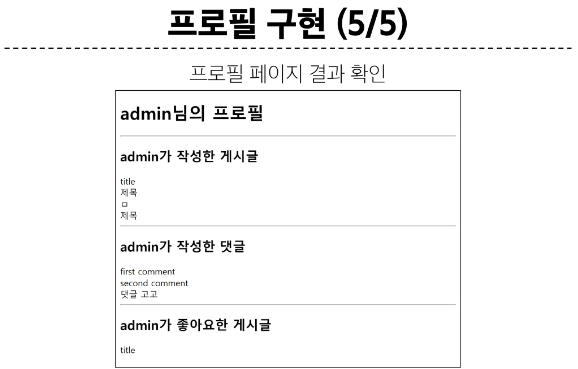

### 모델 관계 설정

- User(M) - User(N) : 0명 이상의 회원은 0명 이상의 회원과 관련
    - 회원은 0명 이상의 다른 회원들을 팔로잉 할 수 있음

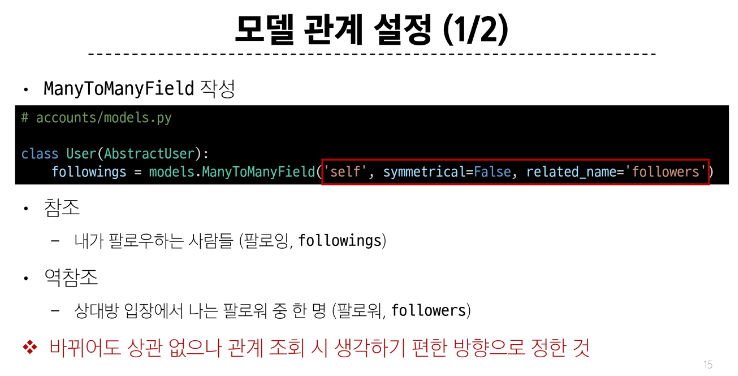

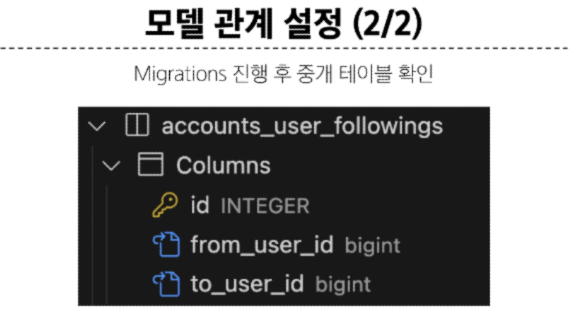

### 기능 구현

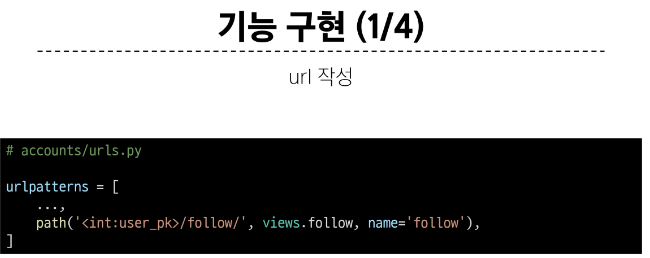

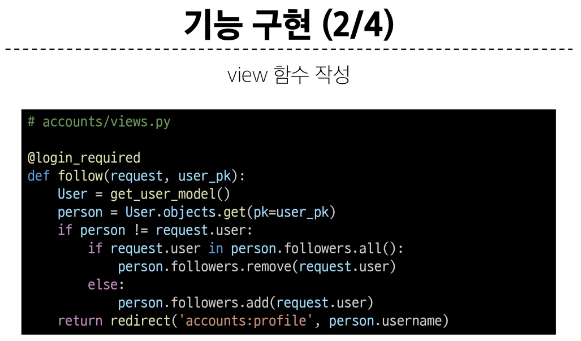

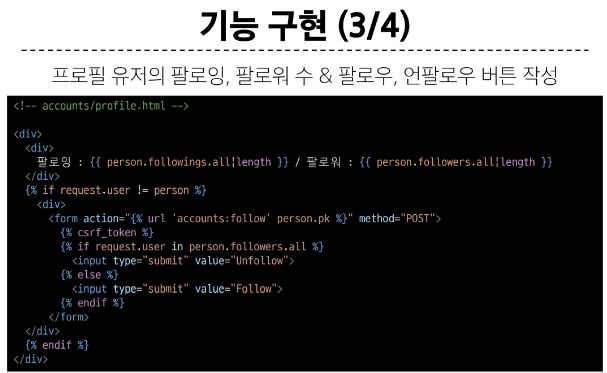

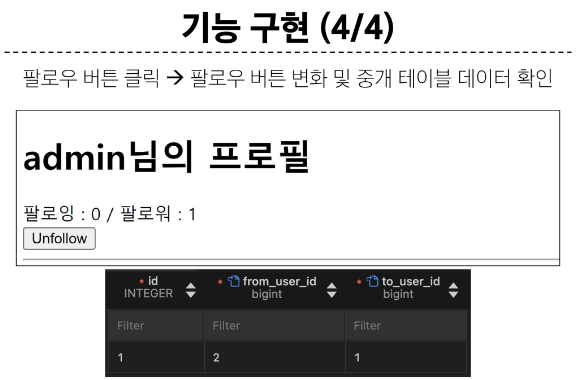

## Fixtures
### 개요
- Fixtures : Django가 데이터베이스로 가져오는 방법을 알고 있는 데이터 모음
    - 데이터는 데이터베이스 구조에 맞추어 작성되어 있음

- 초기 데이터 제공 : Fixtures의 사용 목적

#### 초기 데이터의 필요성
- 협업하는 유저 A,B가 있다고 생각해보기
    1. A가 먼저 프로젝트를 작업 후 원격 저장소에 push 진행
        - gitignore로 인해 DB는 업로드하지 않기 때문에 A가 생성한 데이터도 업로드 X 
    
    2. B가 원격 저장소에서 A가 push한 프로젝트를 pull (혹은 clone)
        - 결과적으로 B는 DB가 없는 프로젝트를 받게 됨

- 이처럼 프로젝트의 앱을 처음 설정할 때 동일하게 준비 된 데이터로 데이터베이스를 미리 채우는 것이 필요한 순간이 있음

- Django에서는 fixtures를 사용해 앱에 초기 데이터(initial data)를 제공

<hr>

## 사전 준비
- M:N 까지 모두 작성된 Django 프로젝트에서 유저, 게시글, 댓글 등 각 데이터를 최소 2~3개 이상 생성해두기

- fixtures 관련 명령어
    - dumpdata : 생성 (데이터 추출)

    - loaddata : 로드 (데이터 입력)

### dumpdata
- dumpdata : 데이터베이스의 모든 데이터를 추출

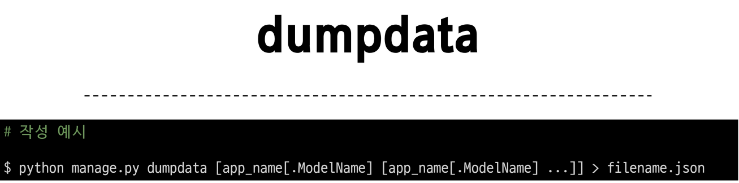

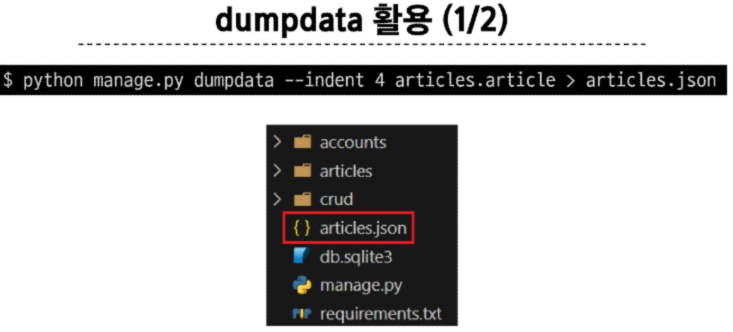

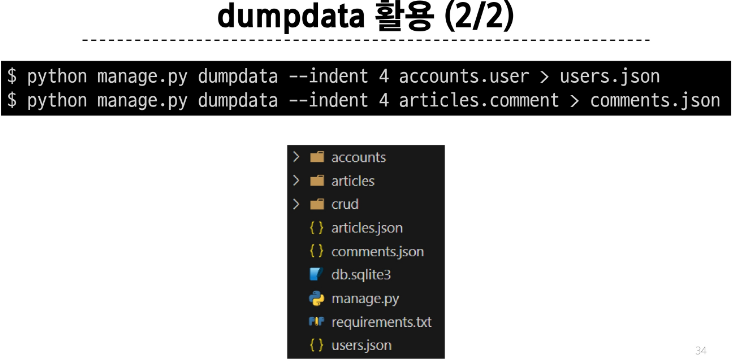

- Fixtures 파일을 직접 만들지 말 것 : 반드시 dumpdata 명령어를 사용하여 생성

### loaddata
- loaddata : Fixtures 데이터를 데이터베이스로 불러오기

- Fixtures 파일 기본 경로 : app_name/fixtures/
    - Django는 설치된 모든 app의 디렉토리에서 fixtures 폴더 이후의 경로로 fixtures 파일을 찾아 load 

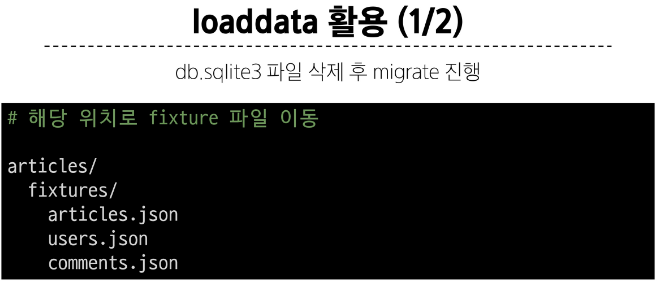

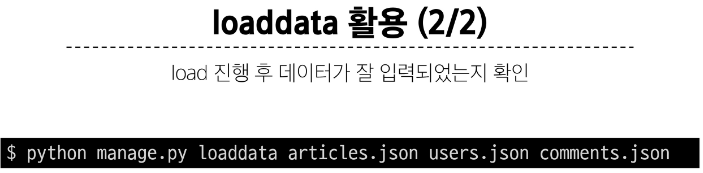

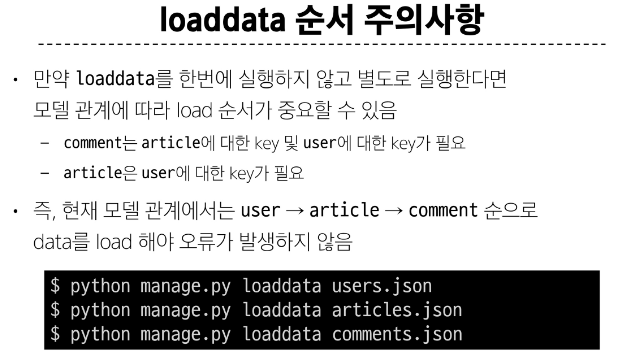

<hr>

## Improve query
### 사전 준비
- Improve query : "query 개선하기"
    - 같은 결과를 얻기 위해 DB 측에 보내는 query 개수를 점차 줄여 조회하기

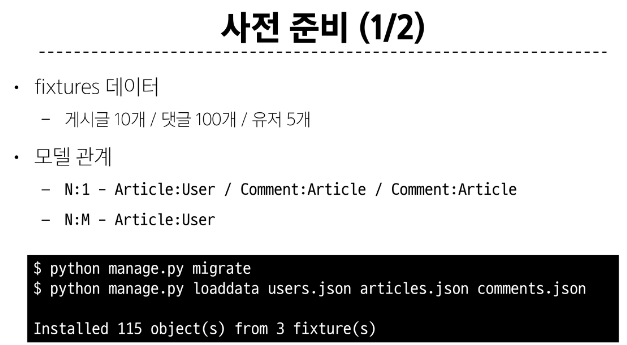

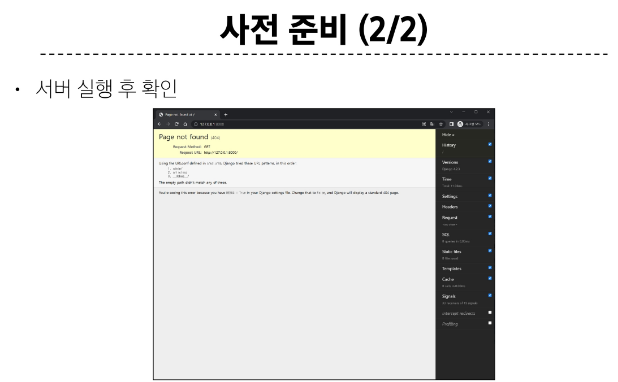

### annotate
- SQL의 GROUP BY를 사용

- 쿼리셋의 각 객체에 계산된 필드를 추가

- 집계 함수 (Count, Sum 등)와 함께 자주 사용됨

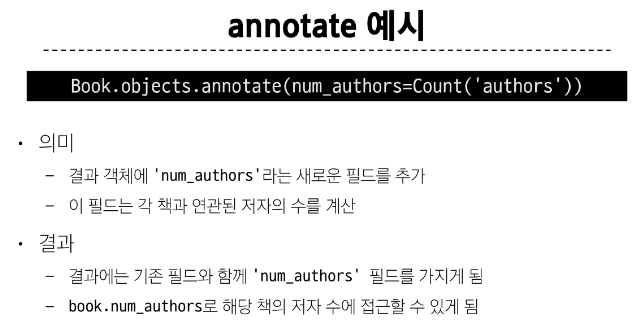

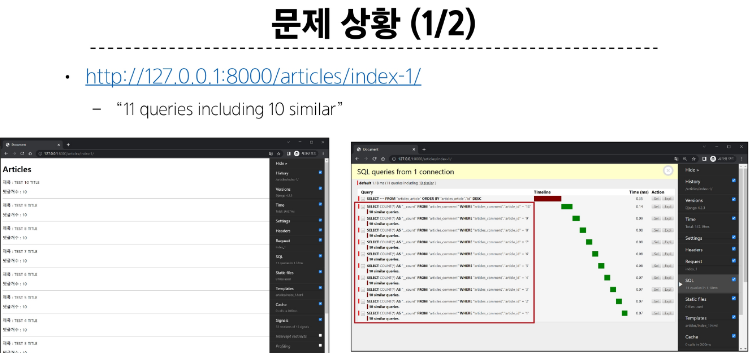

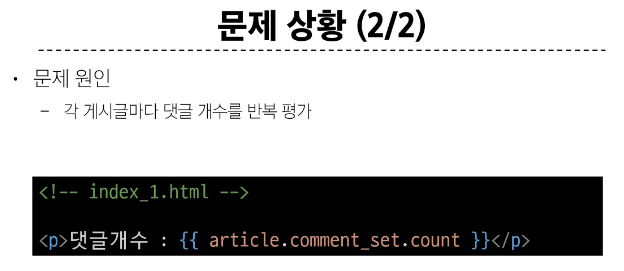

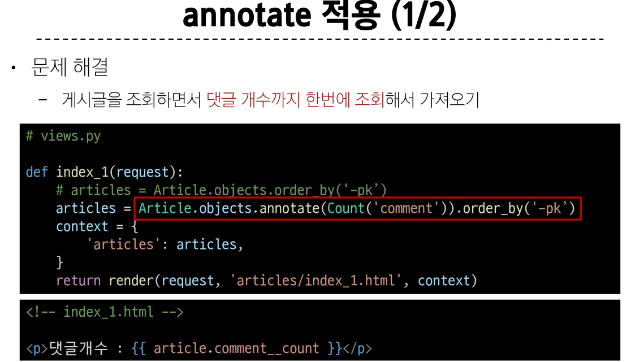

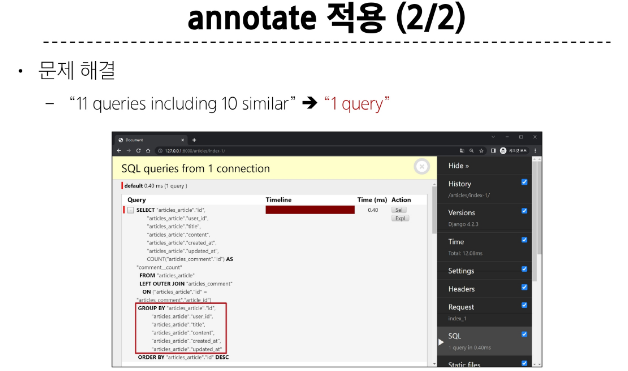

### select_related
- SQL의 INNER JOIN를 사용

- 1:1 또는 N:1 참조 관계에서 사용
    - ForeignKey나 OneToOneField 관계에 대해 JOIN을 수행

- 단일 쿼리로 관련 객체를 함께 가져와 성능을 향상

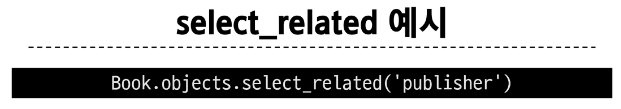

- 의미 
    - Book 모델과 연관된 Publisher 모델의 데이터를 함께 가져옴

    - ForeignKey 관계인 'publisher'를 JOIN하여 단일 쿼리 만으로 데이터를 조회

- 결과
    - Book 객체를 조회할 때 연관된 Publisher 정보도 함께 업로드

    - book.publisher.name 과 같은 접근이 추가적인 데이터베이스 쿼리없이 가능

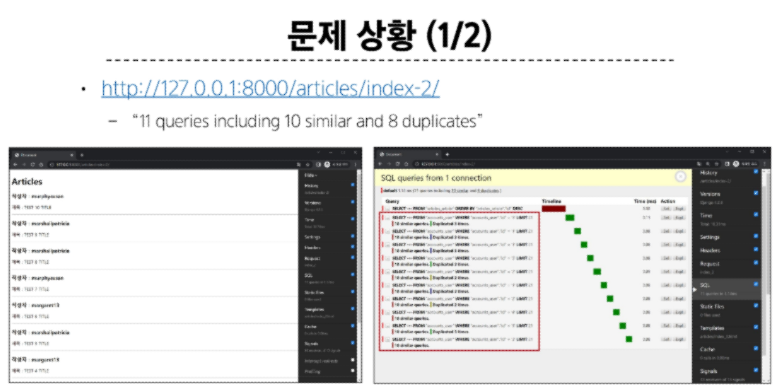

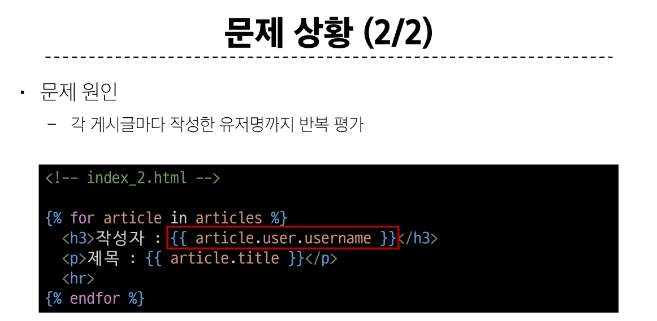

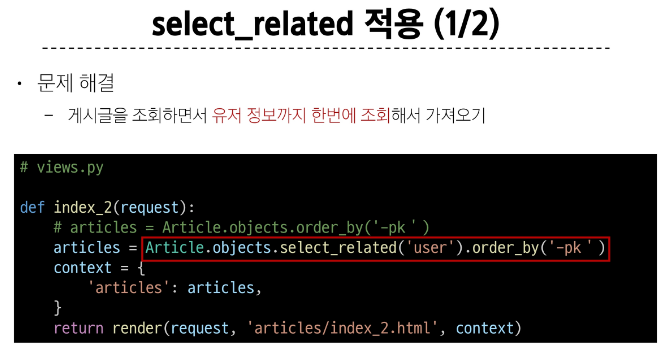

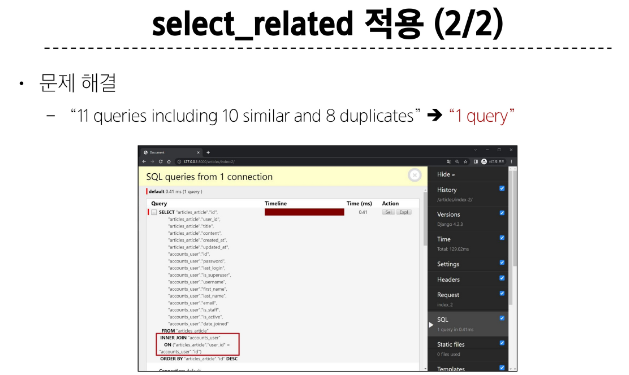

### prefetch_related 
- SQL이 아닌 Python을 사용한 JOIN을 진행
    - 관련 객체들을 미리 가져와 메모리에 저장하여 성능을 향상

- M:N 또는 N:1 역참조 관계에서 사용
    - ManyToManyField나 역참조 관계에 대해 별도의 쿼리를 실행

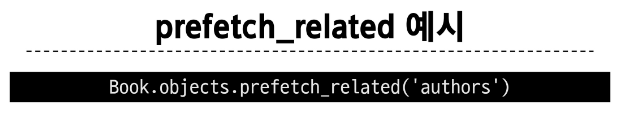

- 의미 
    - Book과 Author는 ManyToMany 관계로 지정

    - Book 모델과 연관된 모든 Author 모델의 데이터를 미리 가져옴

    - Django가 별도의 쿼리로 Author 데이터를 가져와 관계를 설정

- 결과 
    - Book 객체들을 조회한 후, 연관된 모든 Author 정보가 미리 로드 됨

    - for author in book.authors.all()와 같은 반복이 추가적인 데이터베이스 쿼리없이 실행됨

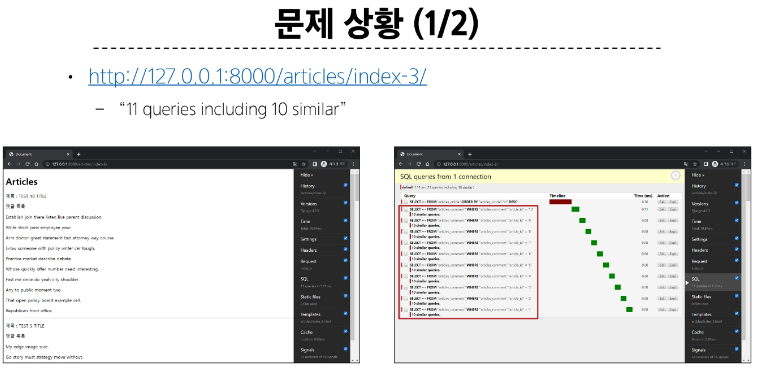

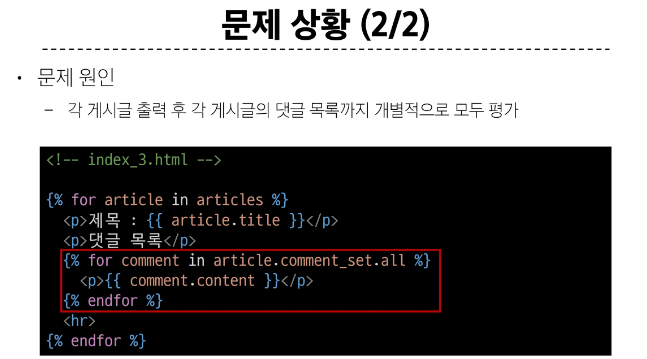

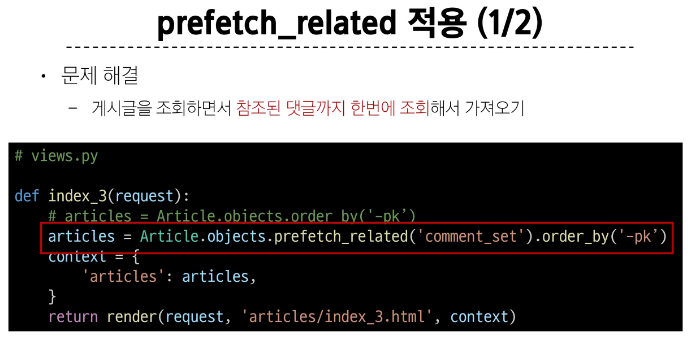

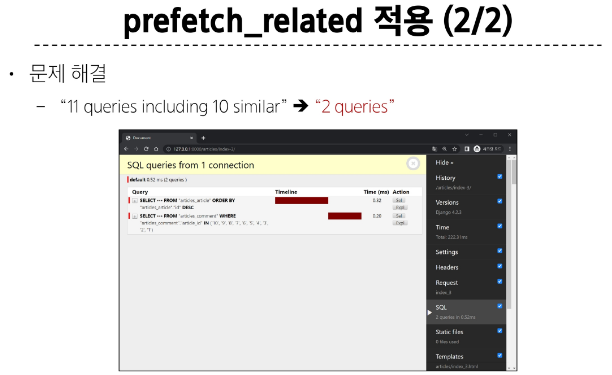

### select_related & prefetch_related 

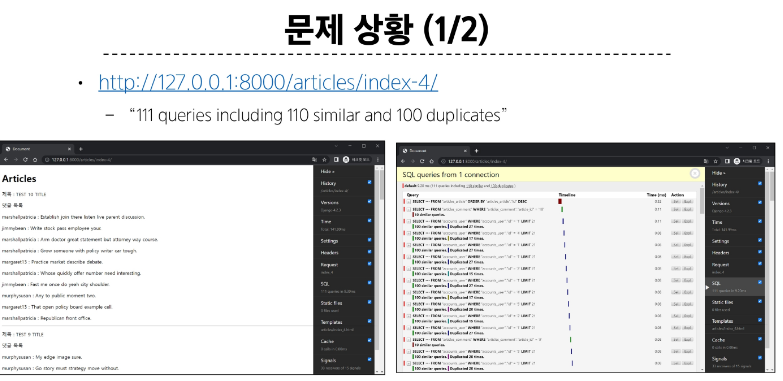

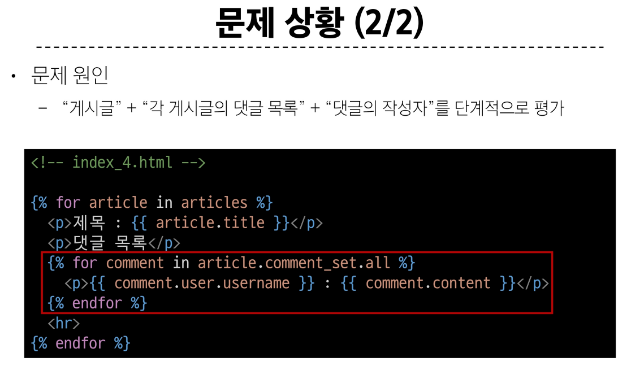

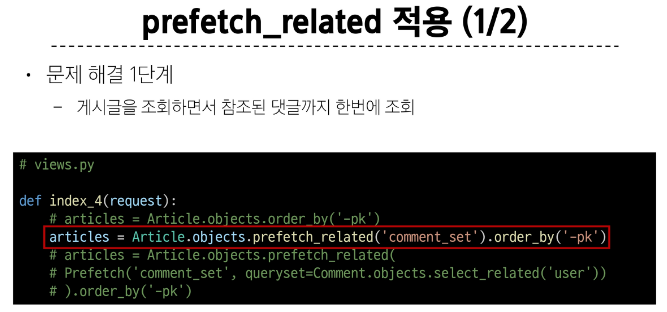

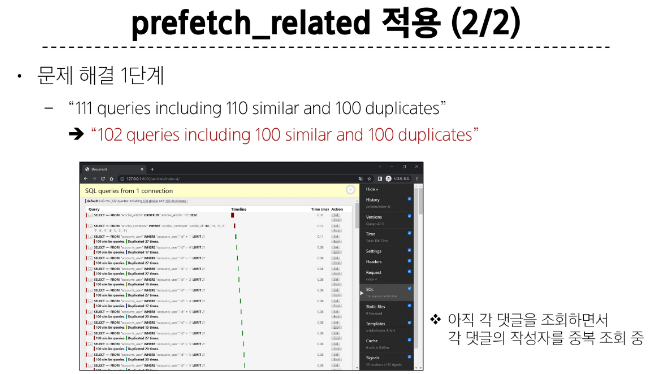

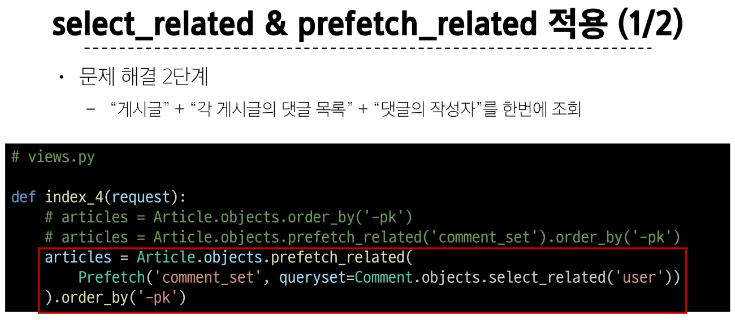

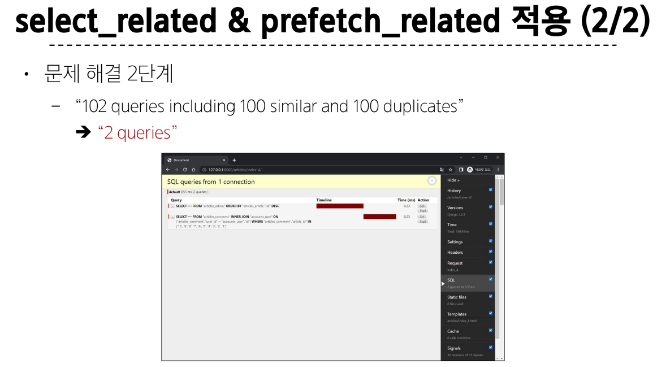

# 참고
## 'exists' method
- .exists()
    - QuerySet에 결과가 하나 이상 존재하는지 여부를 확인하는 메서드

    - 결과가 포함되어 있으면 True를 반환하고 결과가 포함되어 있지 않으면 False를 반환

- .exists() 특징
    - 데이터베이스에 최소한의 쿼리만 실행하여 효율적

    - 전체 QuerySet을 평가하지 않고 결과의 존재 여부만 확인

    - 대량의 QuerySet에 있는 특정 객체 검색에 유용

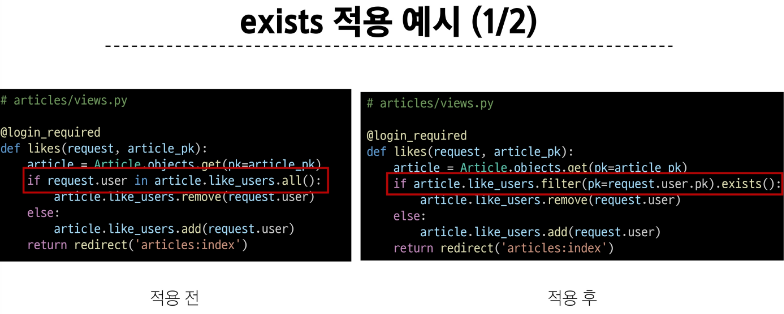

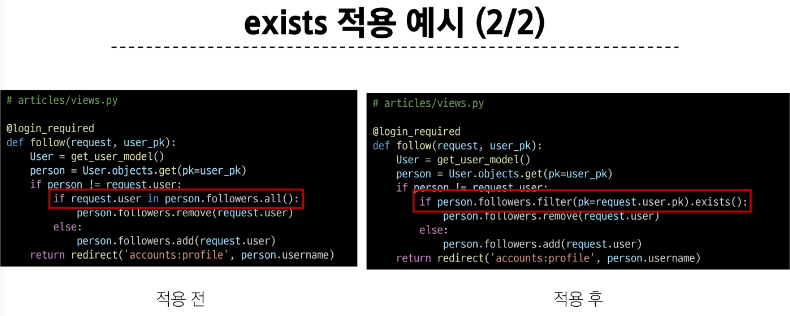

## 한꺼번에 dump하기

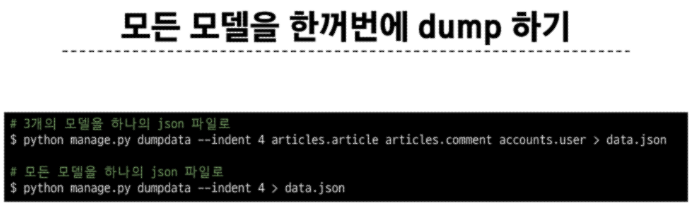

## loaddata 인코딩 에러

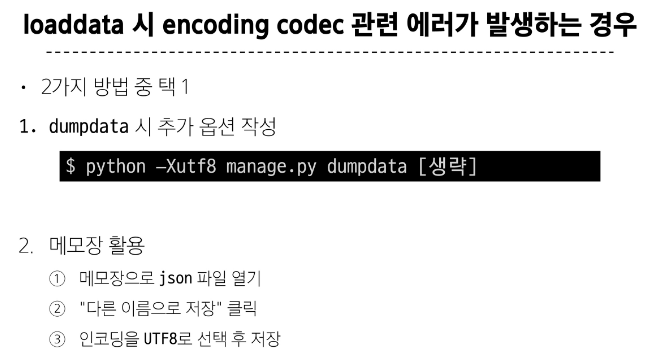